# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [37]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [69]:
print(iris.keys())
print(iris['filename']) # C:\...\anaconda3\Lib\site-packages\sklearn\datasets\data
print(iris.data[0:10])
print(type(iris.data))
print(iris.target_names)
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [71]:
print(iris["data"].size) # 4個 column, 每個有 150 個 row => 4*150 = 600
print(iris["data"].size/len(iris["feature_names"])) # 總格數 / 欄位數 = 一欄有幾格

600
150.0


In [39]:
# we only take the first two features. 
X = iris.data[:,:2] # 取前 2 個 columns
print(X.shape)

Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [41]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [35]:
print(f"target_name={str(iris["target_names"])}")

target_name=['setosa' 'versicolor' 'virginica']


In [43]:
#建立Target欄位與資料
y = pd.DataFrame(iris["target"], columns=["target"])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [89]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[["sepal length (cm)", "sepal width (cm)", "target"]]
iris_data.head(10)

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [91]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data["target"].isin([0,1])]
iris_data.head(10)

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [93]:
iris_data.shape

(100, 3)

## 切分訓練集與測試集
> train_test_split()

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris_data[["sepal length (cm)", "sepal width (cm)"]], iris_data[["target"]], test_size=0.3) # test_size: 測試資料的比例

In [85]:
print(X_train.head())
print(X_train.shape)

    sepal length (cm)  sepal width (cm)
34                4.9               3.1
23                5.1               3.3
78                6.0               2.9
0                 5.1               3.5
52                6.9               3.1
(70, 2)


In [87]:
print(X_test.head())
print(X_test.shape)

    sepal length (cm)  sepal width (cm)
51                6.4               3.2
90                5.5               2.6
74                6.4               2.9
28                5.2               3.4
7                 5.0               3.4
(30, 2)


In [95]:
print(Y_train.head())
print(Y_train.shape)

    target
34       0
23       0
78       1
0        0
52       1
(70, 1)


In [97]:
print(Y_test.head())
print(Y_test.shape)

    target
51       1
90       1
74       1
28       0
7        0
(30, 1)


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [198]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs, axis=0)
    sigma = np.std(dfs, axis=0)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [200]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
# arr_y_train = np.array(y_train)
arr_x_train[:5]

array([[-0.94958589,  0.03975989],
       [-0.62769237,  0.43735883],
       [ 0.82082848, -0.35783904],
       [-0.62769237,  0.83495777],
       [ 2.26934932,  0.03975989]])

## use sklearn

In [221]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.49 3.08]
[0.62132347 0.50301945]


In [223]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.94958589,  0.03975989],
       [-0.62769237,  0.43735883],
       [ 0.82082848, -0.35783904],
       [-0.62769237,  0.83495777],
       [ 2.26934932,  0.03975989]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [227]:
# 這格是錯誤示範
# 原因: 上面在設定 sc 時是 fit X_train 這個資料集而去產生的額外參數, 這裡如果再用 transform 處理 X_test 這資料就會有問題
# 例外: 除非你認為某些情況 用 X_train fit 出來的參數給 X_test 做 transform會得到比較好的效果, 那就可以用, 但是必須要有好的理由
X_test_std = sc.transform(X_test)
print(X_test_std[:10])
print()
# 用上面的方法驗證 X_test 應該長甚麼樣子
stats = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
print(arr_x_test[:10])

[[ 1.46461552  0.23855936]
 [ 0.01609468 -0.95423745]
 [ 1.46461552 -0.35783904]
 [-0.46674561  0.6361583 ]
 [-0.78863913  0.6361583 ]
 [ 0.98177524 -0.35783904]
 [ 0.17704144 -0.35783904]
 [-0.78863913  0.83495777]
 [-0.78863913  1.03375723]
 [-0.78863913 -2.14703426]]

[[ 1.44250747  0.14030434]
 [ 0.10868207 -1.34527102]
 [ 1.44250747 -0.60248334]
 [-0.3359264   0.63549612]
 [-0.63233204  0.63549612]
 [ 0.997899   -0.60248334]
 [ 0.25688489 -0.60248334]
 [-0.63233204  0.88309202]
 [-0.63233204  1.13068791]
 [-0.63233204 -2.83084637]]


you can also use fit_transform method (i.e., fit and then transform)    

In [229]:
# 用這個方法就不用擔心上面的問題
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[ 1.44250747  0.14030434]
 [ 0.10868207 -1.34527102]
 [ 1.44250747 -0.60248334]
 [-0.3359264   0.63549612]
 [-0.63233204  0.63549612]
 [ 0.997899   -0.60248334]
 [ 0.25688489 -0.60248334]
 [-0.63233204  0.88309202]
 [-0.63233204  1.13068791]
 [-0.63233204 -2.83084637]]


In [231]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.404508189472544
29.4632428938424


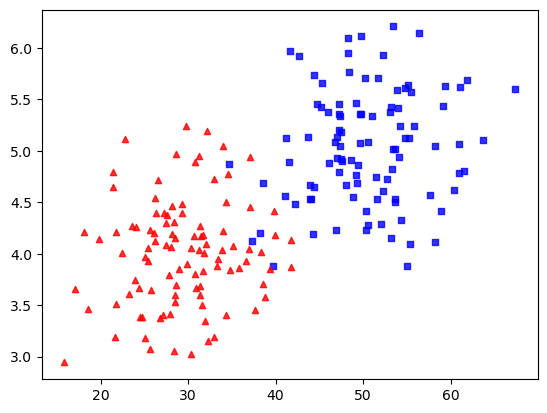

In [233]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [245]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [237]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [239]:
minmax_norm(x_val[:10])

array([0.54209051, 0.36936913, 0.        , 0.36887678, 0.6048098 ,
       0.57560415, 0.49349182, 0.40704129, 0.3425559 , 1.        ])

In [247]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1) # 1D -> 2D
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[:10])

(200,)
(200, 1)
[67.38209723]
[15.8750329]
[[0.64107875]
 [0.55289276]
 [0.36430473]
 [0.55264138]
 [0.67310121]
 [0.65818974]
 [0.61626582]
 [0.57212695]
 [0.53920278]
 [0.87487265]]
